<a href="https://colab.research.google.com/github/shuvo1165/Machine-Learning/blob/main/numpy_array_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = '/content/drive/MyDrive/Kaggle/train'

CATEGORIES = ["Bacterial leaf blight", "Brown spot", "Leaf smut"]

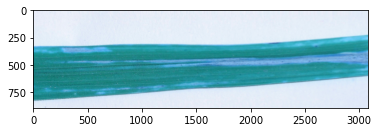

In [ ]:
for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img))  # convert to array
        plt.imshow(img_array)  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [ ]:
print(img_array)

[[[234 238 249]
  [233 237 248]
  [233 237 248]
  ...
  [227 237 247]
  [227 237 247]
  [227 237 247]]

 [[234 238 249]
  [233 237 248]
  [233 237 248]
  ...
  [227 237 247]
  [227 237 247]
  [227 237 247]]

 [[234 238 249]
  [233 237 248]
  [233 237 248]
  ...
  [227 237 247]
  [227 237 247]
  [227 237 247]]

 ...

 [[227 236 249]
  [227 236 249]
  [226 235 248]
  ...
  [225 234 248]
  [226 235 249]
  [224 233 247]]

 [[227 236 249]
  [227 236 249]
  [226 235 248]
  ...
  [225 233 250]
  [226 235 249]
  [224 232 249]]

 [[226 235 248]
  [227 236 249]
  [227 236 249]
  ...
  [224 231 250]
  [224 232 249]
  [224 231 250]]]


In [ ]:
print(img_array.shape)

(897, 3081, 3)


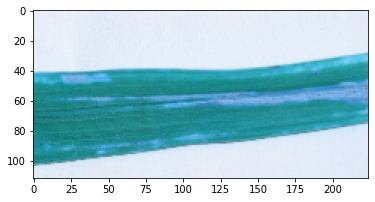

In [ ]:
IMG_SHAPE = (224,112)

new_array = cv2.resize(img_array,IMG_SHAPE )
plt.imshow(new_array)
plt.show()

In [ ]:
print(img_array.shape)

(897, 3081, 3)


In [ ]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img))  # convert to array
                new_array = cv2.resize(img_array,IMG_SHAPE )  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|██████████| 303/303 [03:16<00:00,  1.54it/s]

911


In [ ]:
import random

random.shuffle(training_data)

In [ ]:
for sample in training_data[:10]:
    print(sample[1])

2
2
0
1
1
2
1
0
2
2


In [ ]:
X_train = []
y_train = []

for features,label in training_data:
    X_train.append(features)
    y_train.append(label)

print(X_train[0].reshape(-1,224 , 112, 3))

[[[[233 235 245]
   [234 236 247]
   [234 236 247]
   ...
   [234 236 246]
   [235 238 247]
   [234 236 247]]

  [[237 239 249]
   [234 236 246]
   [236 238 248]
   ...
   [231 233 244]
   [232 236 247]
   [233 235 246]]

  [[235 237 247]
   [236 238 249]
   [236 238 249]
   ...
   [236 239 246]
   [235 239 245]
   [234 236 247]]

  ...

  [[235 237 247]
   [230 236 247]
   [234 239 248]
   ...
   [230 234 245]
   [233 235 246]
   [232 234 245]]

  [[235 237 247]
   [235 237 247]
   [235 237 247]
   ...
   [236 240 245]
   [236 238 248]
   [235 237 247]]

  [[235 237 247]
   [230 236 247]
   [234 239 248]
   ...
   [230 234 245]
   [232 234 245]
   [232 234 245]]]]


In [ ]:
X_train = np.array(X_train).reshape(-1, 224, 112, 3)

In [ ]:
import pickle

pickle_out = open("X_train.pickle","wb")
pickle.dump(X_train, pickle_out)
pickle_out.close()

pickle_out = open("y_train.pickle","wb")
pickle.dump(y_train, pickle_out)
pickle_out.close()

In [ ]:
pickle_in = open("X_train.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y_train.pickle","rb")
y = pickle.load(pickle_in)

In [ ]:
X=np.array(X/255.0)

y=np.array(y)

In [ ]:
X[0]

array([[[0.91372549, 0.92156863, 0.96078431],
        [0.91764706, 0.9254902 , 0.96862745],
        [0.91764706, 0.9254902 , 0.96862745],
        ...,
        [0.91764706, 0.9254902 , 0.96470588],
        [0.92156863, 0.93333333, 0.96862745],
        [0.91764706, 0.9254902 , 0.96862745]],

       [[0.92941176, 0.9372549 , 0.97647059],
        [0.91764706, 0.9254902 , 0.96470588],
        [0.9254902 , 0.93333333, 0.97254902],
        ...,
        [0.90588235, 0.91372549, 0.95686275],
        [0.90980392, 0.9254902 , 0.96862745],
        [0.91372549, 0.92156863, 0.96470588]],

       [[0.92156863, 0.92941176, 0.96862745],
        [0.9254902 , 0.93333333, 0.97647059],
        [0.9254902 , 0.93333333, 0.97647059],
        ...,
        [0.9254902 , 0.9372549 , 0.96470588],
        [0.92156863, 0.9372549 , 0.96078431],
        [0.91764706, 0.9254902 , 0.96862745]],

       ...,

       [[0.92156863, 0.92941176, 0.96862745],
        [0.90196078, 0.9254902 , 0.96862745],
        [0.91764706, 0

In [ ]:
X.shape

(911, 224, 112, 3)

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [ ]:
y.shape

(911,)

In [ ]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(y, 3)

In [ ]:
y.shape

(911, 3)

In [ ]:
model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(3))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y, batch_size=32, epochs=7, validation_split=0.3)

Epoch 1/7
20/20 [==============================] - 4s 193ms/step - loss: 7.3401 - accuracy: 0.4035 - val_loss: 1.0312 - val_accuracy: 0.4380
Epoch 2/7
20/20 [==============================] - 3s 134ms/step - loss: 1.0085 - accuracy: 0.4788 - val_loss: 0.9067 - val_accuracy: 0.5109
Epoch 3/7
20/20 [==============================] - 3s 134ms/step - loss: 0.8813 - accuracy: 0.5338 - val_loss: 0.8850 - val_accuracy: 0.5036
Epoch 4/7
20/20 [==============================] - 3s 134ms/step - loss: 0.8234 - accuracy: 0.5620 - val_loss: 0.8925 - val_accuracy: 0.5365
Epoch 5/7
20/20 [==============================] - 3s 134ms/step - loss: 0.8423 - accuracy: 0.6107 - val_loss: 0.9111 - val_accuracy: 0.5547
Epoch 6/7
20/20 [==============================] - 3s 134ms/step - loss: 0.7614 - accuracy: 0.6484 - val_loss: 0.8687 - val_accuracy: 0.5511
Epoch 7/7
20/20 [==============================] - 3s 135ms/step - loss: 0.6680 - accuracy: 0.6986 - val_loss: 0.8003 - val_accuracy: 0.6095


In [ ]:
%load_ext tensorboard
from tensorflow.keras.callbacks import TensorBoard
log_dir='log/'
!rm -rf log/

In [ ]:
import datetime as dt
callbacks = [tf.keras.callbacks.TensorBoard(log_dir='log/{}'.format(dt.datetime.now().strftime("%Y-%m-%d-%H-%M-%S")))]

In [ ]:
model2 = Sequential()

model2.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(256, (3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model2.add(Dense(64))

model2.add(Dense(3))
model2.add(Activation('softmax'))

model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model2.fit(X, y, batch_size=32, epochs=30, validation_split=0.3)

Epoch 1/30
20/20 [==============================] - 3s 157ms/step - loss: 9.1896 - accuracy: 0.3940 - val_loss: 0.9947 - val_accuracy: 0.4635
Epoch 2/30
20/20 [==============================] - 3s 143ms/step - loss: 1.0383 - accuracy: 0.4710 - val_loss: 0.9872 - val_accuracy: 0.3869
Epoch 3/30
20/20 [==============================] - 3s 142ms/step - loss: 0.9329 - accuracy: 0.5432 - val_loss: 0.9168 - val_accuracy: 0.5292
Epoch 4/30
20/20 [==============================] - 3s 142ms/step - loss: 0.8431 - accuracy: 0.6060 - val_loss: 0.8455 - val_accuracy: 0.5985
Epoch 5/30
20/20 [==============================] - 3s 143ms/step - loss: 0.7616 - accuracy: 0.6452 - val_loss: 0.8603 - val_accuracy: 0.5438
Epoch 6/30
20/20 [==============================] - 3s 144ms/step - loss: 0.7644 - accuracy: 0.5840 - val_loss: 0.7976 - val_accuracy: 0.6277
Epoch 7/30
20/20 [==============================] - 3s 144ms/step - loss: 0.6824 - accuracy: 0.6797 - val_loss: 0.8365 - val_accuracy: 0.6022
Epoch 

In [1]:
%tensorboard --logdir log/

UsageError: Line magic function `%tensorboard` not found.
